In [1]:
# %matplotlib notebook

In [2]:
import sys
sys.path.append('/Users/jakob/Documents/RU/Code/segment')
import watershed3d
from imutils import random_cmap
from skimage.morphology import watershed
import matplotlib as mpl
from skimage.measure import regionprops
import pandas as pd
import tifffile as tiff
# import imutils

In [3]:
# def myrandom_cmap(return_darker=False, n=1024):

#     """
#     make random colormap, good for plotting segmentation

#     :param return_darker: also return a darker version
#     :param n: number of colors
#     :return: colormap(s)
#     """

#     random_array = np.random.rand(n, 3)
#     random_array[0, :] = 1.
#     random_array2 = np.zeros((n, 4))
#     random_array2[:, :3] = random_array
#     random_array2[:, 3] = .8

#     if return_darker:
#         return mpl.colors.ListedColormap(random_array), mpl.colors.ListedColormap(random_array2)
#     else:
#         return mpl.colors.ListedColormap(random_array)


load file 

In [4]:
filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c1.tif'
w = watershed3d.Ws3d(filename)

check histogram of image data

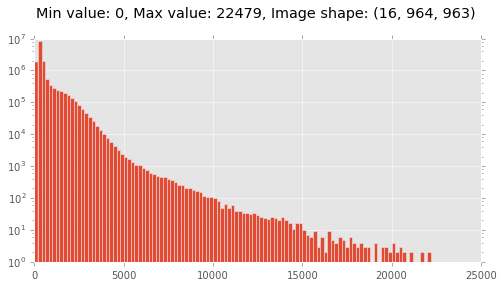

In [5]:
w.histogram_plot()

load Ilastik probability mask and plot it

In [6]:
w.load_mask(prob=0.3)
# w.plot_probability_map()

loaded probability map
loaded object prediction


do segmentation without the object classifier

In [7]:
w.segment(do_not_use_object_classifier=1)

setting sigma to default (2, 6, 6)
segmentation done, found 486 cells


show segmentation

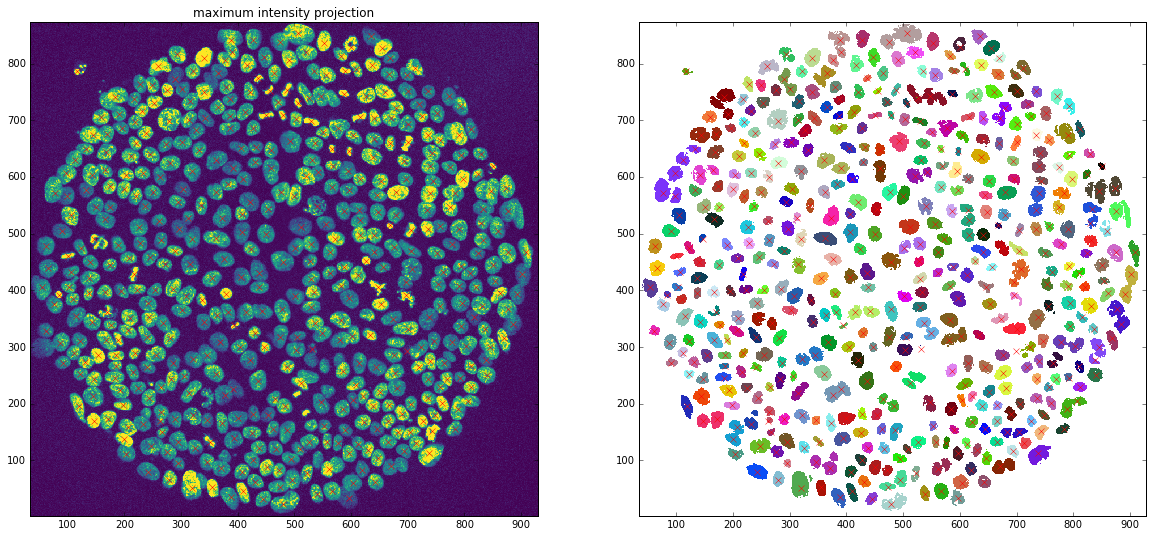

In [8]:
w.show_segmentation(z=11,figsize=(20,10), seed=130)

In [9]:
w.df.head()

,area,total_intensity,mean_intensity,centroid
cell_id,,,,
1,1,6500.0,6500.000000,"[5.0, 519.0, 830.0]"
3,1,12024.0,12024.000000,"[7.0, 169.0, 262.0]"
4,748,2180639.0,2915.292781,"[6.89572192513, 296.390374332, 531.065508021]"
5,2525,6203709.0,2456.914455,"[9.2998019802, 724.865742574, 792.827722772]"
6,5080,6673673.0,1313.715157,"[11.0604330709, 89.6614173228, 677.189173228]"


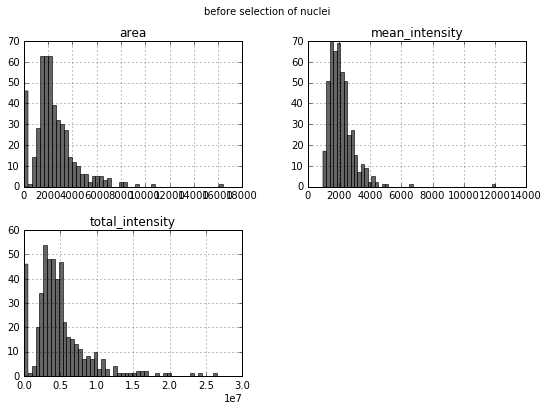

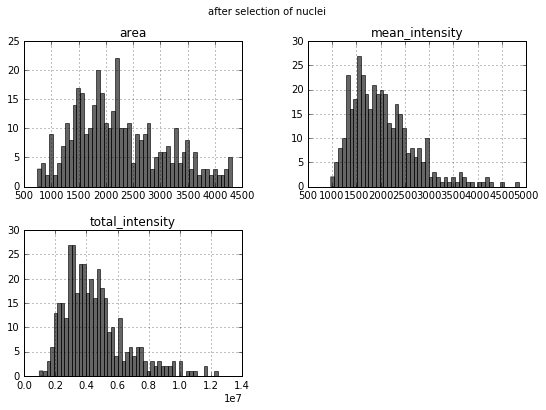

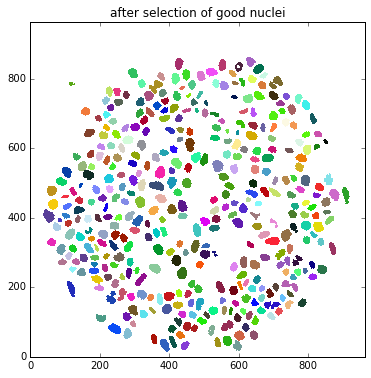

In [10]:
w.select_nuclei()

apply to other channels

In [11]:
filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c2.tif'
filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c3.tif'
filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c4.tif'

In [12]:
w.apply_to_channels(filename_sox2, 'sox2')

In [17]:
w.df[w.good_nuclei]

,area,total_intensity,mean_intensity,centroid
cell_id,,,,
4,748,2180639.0,2915.292781,"[6.89572192513, 296.390374332, 531.065508021]"
5,2525,6203709.0,2456.914455,"[9.2998019802, 724.865742574, 792.827722772]"
8,3855,8992075.0,2332.574578,"[10.8993514916, 149.010116732, 694.104539559]"
10,3173,6971290.0,2197.065868,"[10.60447526, 466.648282383, 908.732429877]"
16,3998,9952337.0,2489.328914,"[10.8426713357, 743.284642321, 626.887943972]"
17,2651,5257839.0,1983.341758,"[10.9422859298, 758.743870238, 380.763485477]"
18,2459,5666117.0,2304.236275,"[10.3037820252, 782.694591297, 464.618544124]"
19,3273,8445734.0,2580.425909,"[10.267644363, 799.557592423, 417.416131989]"
21,2389,7335773.0,3070.645877,"[11.0133947258, 833.872750105, 599.826705735]"


/Users/jakob/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bf0f668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d1b59b0>]], dtype=object)

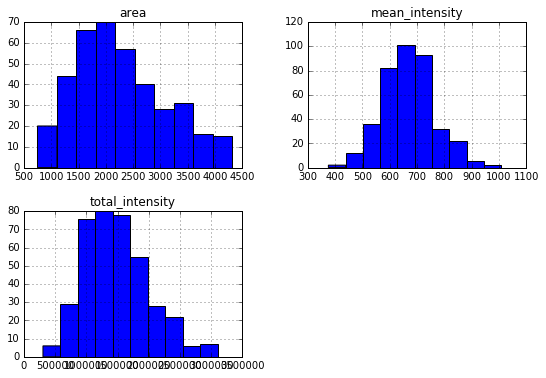

In [27]:
w.channels['sox2'][w.good_nuclei].hist()